## Link

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

## Importing Libraries

In [37]:
#importing libraries

import zipfile
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
from graphviz import Source
from ipywidgets import interactive

## Extracting zip file

In [12]:
#extracting the zip file

with zipfile.ZipFile('./archive.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

## Importing dataset

In [13]:
#importing dataset

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']  
df=pd.read_csv('diabetes.csv')
df.columns=col_names  
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

## Train test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Classification

In [15]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Accuracy

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7597402597402597


## Display the tree

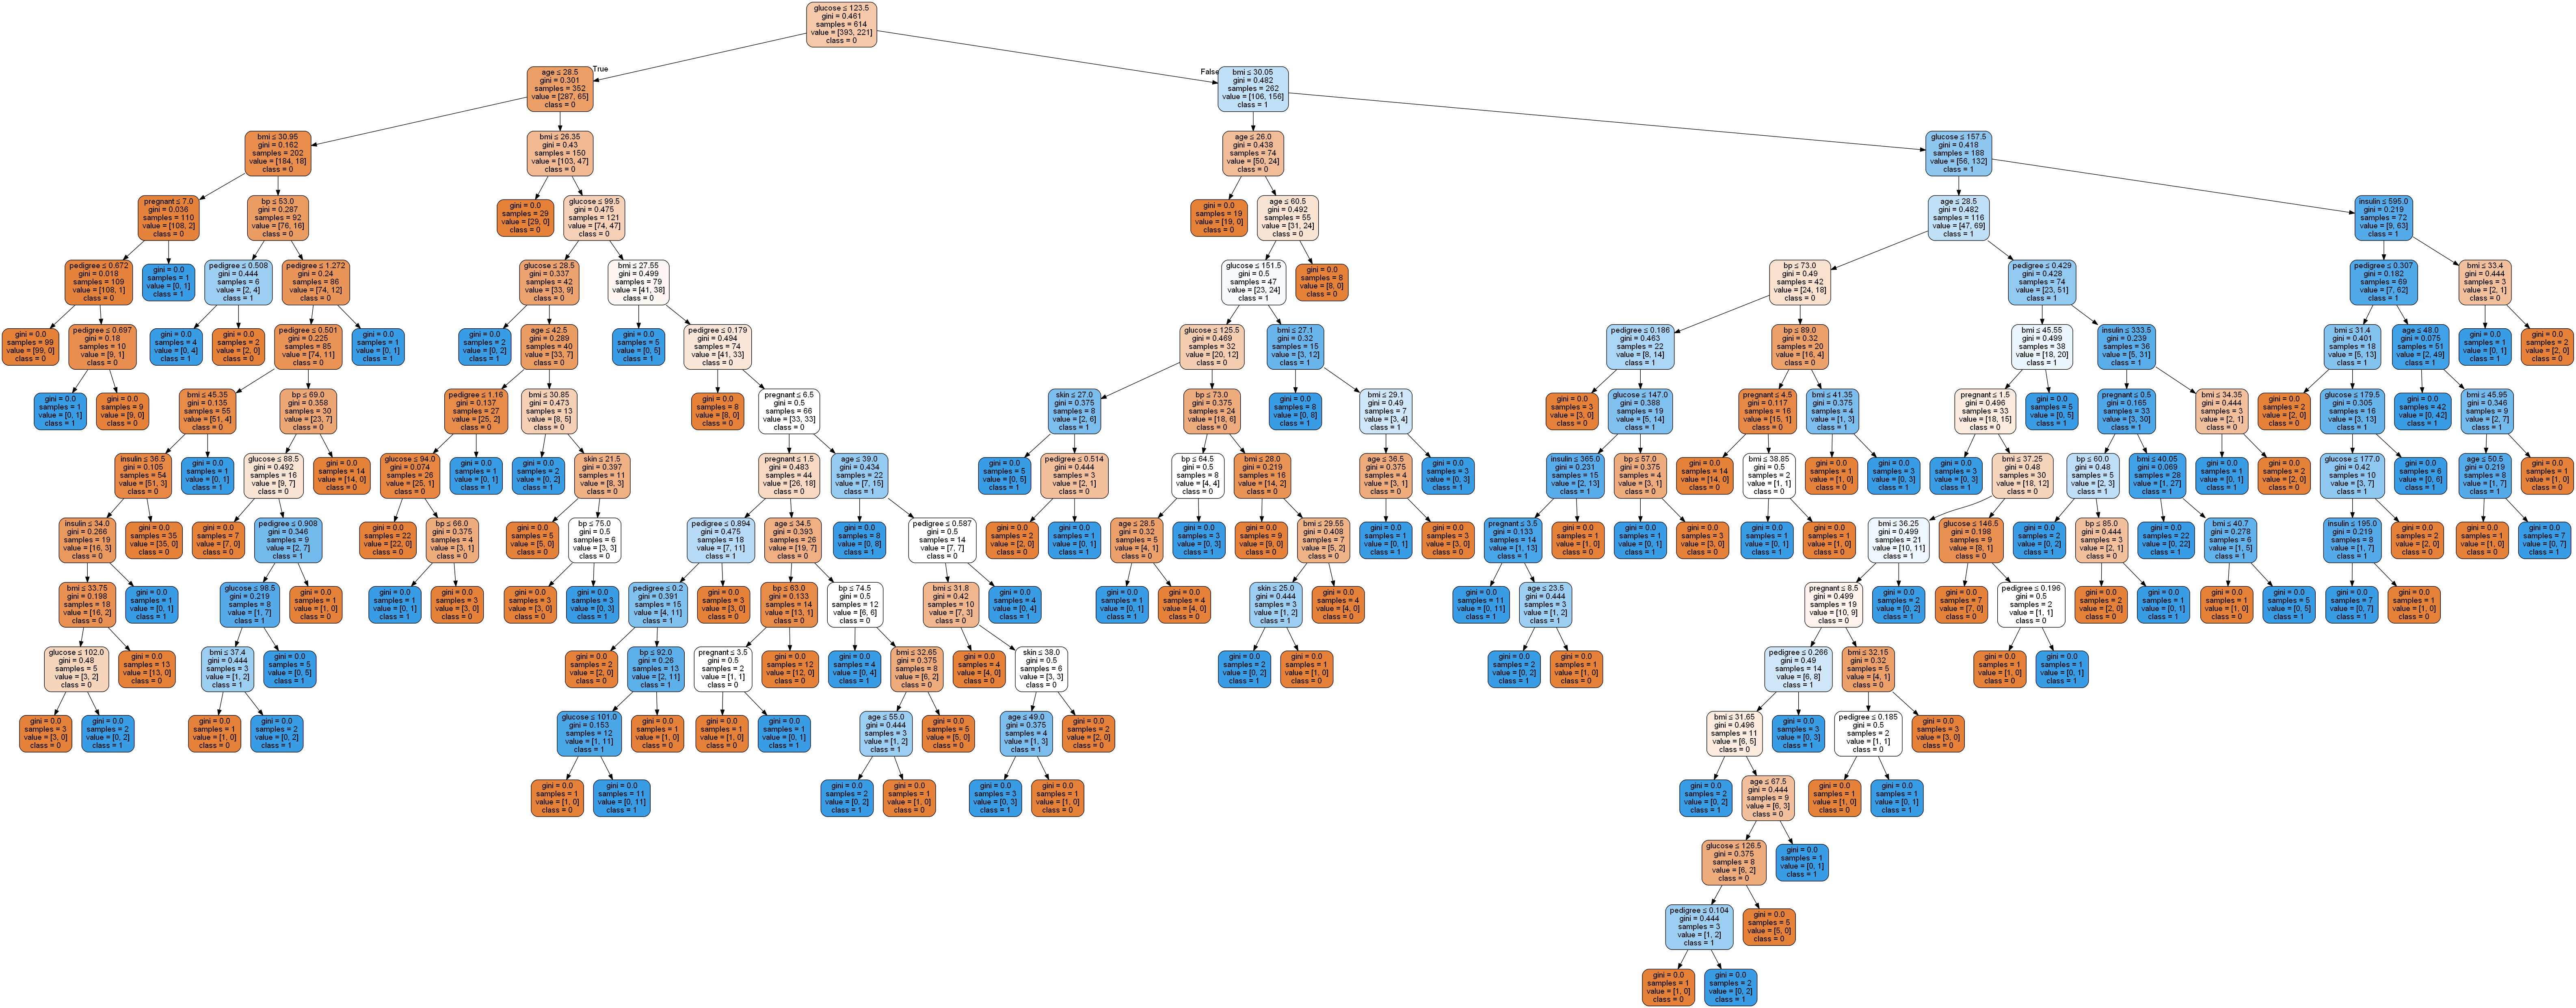

In [18]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names[:-1],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


## Confusion Matrix

Accuracy:  0.7597402597402597
Macro F1 score:  0.7274597024919883


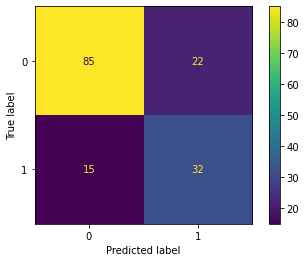

In [36]:
y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Macro F1 score: ", metrics.f1_score(y_test,y_pred,average='macro'))
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Playing with depth

In [34]:
def plot_tree(depth):
    classifier = DecisionTreeClassifier(random_state=0, max_depth = depth)
    classifier.fit(X_train, y_train)
    graph = Source(export_graphviz(classifier, out_file=None
           , feature_names=col_names[:-1], class_names=['0', '1'] 
           , filled = True))
    display(Image(graph.pipe(format='png')))
    y_pred = classifier.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred))
    print("Macro F1 score: ", f1_score(y_test,y_pred,average='macro'))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

In [35]:
inter=interactive(plot_tree , depth=[1,2,3,4,5,6,7,8,9,10])
display(inter)

interactive(children=(Dropdown(description='depth', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=1), Output(…